In [1]:
import seaborn as sns
import matplotlib.transforms as transforms
from datetime import datetime
from skimage.io import imsave
import openpyxl
import numpy as np
import matplotlib.pyplot as plt
#%plt.style.use("v_paper")
import pandas as pd
import deepdish as dd
from scipy.io import loadmat
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as smf
import re
from statsmodels.stats.anova import anova_lm
import os
import os.path
import statsmodels.api as smapi
import sys
import warnings
from sklearn.linear_model import LinearRegression
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import seaborn as sns
import statsmodels as sm
import scipy
from pathlib import Path
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.api as sms


C:\Users\aimon\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
Regionsdf=pd.read_pickle("Z:\GrunwaldKadow_group\Sophie\WalkProject\Regionsdf.pkl")

# Effect of frame rate

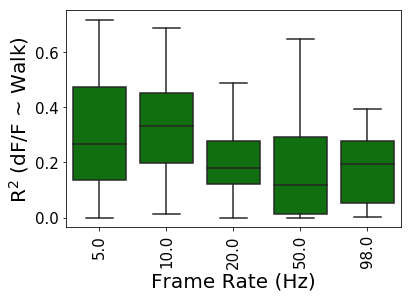

In [3]:
df=Regionsdf.query('GAL4=="Nsyb" or GAL4=="GMR57C10" and UAS=="6f"')
b = sns.boxplot(x='FR',y='R2Walk',data=df,color='g')
plt.xticks(rotation=90)
plt.xticks(fontsize=15)
plt.yticks([0,0.2,0.4,0.6],fontsize=15)
plt.xlabel('Frame Rate (Hz)',fontsize=20)
plt.ylabel('R$^2$ (dF/F ~ Walk)',fontsize=20)
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2WalkwithFrameRate_notsignificant.svg')

In [4]:
df=Regionsdf.query('GAL4=="Nsyb" or GAL4=="GMR57C10" and UAS=="6f"').groupby(['FlyID']).mean()
resAllmm = smf.ols(formula="R2Walk ~ FR", data=df).fit()
resAllmm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 R2Walk   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                 -0.075
Method:                 Least Squares   F-statistic:                    0.3038
Date:                Tue, 04 Jan 2022   Prob (F-statistic):              0.595
Time:                        09:19:39   Log-Likelihood:                 11.187
No. Observations:                  11   AIC:                            -18.37
Df Residuals:                       9   BIC:                            -17.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2542      0.057      4.453      0.002       0.125       0.383
FR            -0.0007      0.001     -0.551      0.595      -0.003       0.002
==============================================================================
Omnibus:                        1.023   Durbin-Watson:                   2.357
Prob(Omnibus):                  0.600   Jarque-Bera (JB):                0.353
Skew:                           0.431   Prob(JB):                        0.838
Kurtosis:                       2.835   Cond. No.                         93.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Check whether convolving was useful

In [5]:
np.nanmean(Regionsdf.query('GAL4=="Nsyb" or GAL4=="GMR57C10"')['R2Walk'])

0.22779610610254974

In [6]:
np.nanmean(Regionsdf.query('GAL4=="Nsyb" or GAL4=="GMR57C10"')['R2Walkbin'])

0.0989663381891618

In [7]:
np.nanmean(Regionsdf['R2Walk'])

0.28455592252011935

In [9]:
np.nanmedian(Regionsdf['R2Walk'])

0.2535163699563392

In [8]:
np.nanmean(Regionsdf['R2Walkbin'])

0.14838214895834145

# Global models

In [12]:
df1=Regionsdf[Regionsdf['R2Walk']>0].query('GAL4=="Nsyb" or GAL4=="GMR57C10"')

dfWGF=df1.assign(R2=df1['R2Walk']).assign(Behavior='Walk').assign(Coef=df1['CoefWalk'])

df2=Regionsdf[Regionsdf['R2Flail']>0].query('GAL4=="Nsyb" or GAL4=="GMR57C10"')

dfWGF=pd.concat([dfWGF,df2.assign(R2=df2['R2Flail']).assign(Behavior='Flail').assign(Coef=df2['CoefFlail'])])

df3=Regionsdf[Regionsdf['R2Groom']>0].query('GAL4=="Nsyb" or GAL4=="GMR57C10"')

dfWGF=pd.concat([dfWGF,df3.assign(R2=df3['R2Groom']).assign(Behavior='Groom').assign(Coef=df3['CoefGroom'])])

In [10]:
result = smf.ols(formula="Coef ~ Behavior+RegionNames+GAL4+UAS", data=dfWGF).fit()
aov_table = anova_lm(result, typ=2)
print(result.rsquared)
aov_table

0.31338447875654907


,sum_sq,df,F,PR(>F)
Behavior,9.553046,2.0,255.800226,2.295163e-103
RegionNames,12.774922,40.0,17.103592,3.392278e-105
GAL4,0.031387,1.0,1.680876,1.949070e-01
UAS,0.653060,4.0,8.743439,5.143446e-07
Residual,56.485415,3025.0,NaN,NaN


Effect of UAS significant: keep in the model to correct for it

In [11]:
result = smf.ols(formula="R2 ~ Behavior+RegionNames+GAL4+UAS", data=dfWGF).fit()
aov_table = anova_lm(result, typ=2)
print(result.rsquared)
aov_table

0.26191611061073794


,sum_sq,df,F,PR(>F)
Behavior,12.215185,2.0,266.382487,2.763996e-107
RegionNames,10.372902,40.0,11.310347,1.095199e-65
GAL4,0.002202,1.0,0.096035,7.566625e-01
UAS,2.082957,4.0,22.712028,1.648872e-18
Residual,69.356913,3025.0,NaN,NaN


In [12]:
from patsy import dmatrices
y, X = dmatrices('R2 ~ Behavior*RegionNames+GAL4+UAS+FR', dfWGF, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,319.9,Intercept
1,60.0,Behavior[T.Groom]
2,60.1,Behavior[T.Walk]
3,13.4,RegionNames[T.AME]
4,13.6,RegionNames[T.AMMC]
...,...,...
124,3.6,Behavior[T.Groom]:RegionNames[T.SPS]
125,12.2,Behavior[T.Walk]:RegionNames[T.SPS]
126,3.6,Behavior[T.Groom]:RegionNames[T.VES]
127,12.2,Behavior[T.Walk]:RegionNames[T.VES]


In [13]:
from patsy import dmatrices
y, X = dmatrices('R2 ~ Behavior*RegionNames', dfWGF, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,219.5,Intercept
1,59.4,Behavior[T.Groom]
2,59.4,Behavior[T.Walk]
3,11.6,RegionNames[T.AME]
4,11.4,RegionNames[T.AMMC]
...,...,...
118,9.8,Behavior[T.Walk]:RegionNames[T.SMP]
119,3.7,Behavior[T.Groom]:RegionNames[T.SPS]
120,9.8,Behavior[T.Walk]:RegionNames[T.SPS]
121,3.7,Behavior[T.Groom]:RegionNames[T.VES]


=> Look at behavior separately:

In [14]:
Regionsdf=Regionsdf.query('GAL4=="Nsyb" or GAL4=="GMR57C10"')

In [15]:
from patsy import dmatrices
y, X = dmatrices('R2Walk ~ RegionNames+GAL4+UAS+FR', Regionsdf, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,88.8,Intercept
1,1.9,RegionNames[T.AME]
2,1.9,RegionNames[T.AMMC]
3,1.9,RegionNames[T.AOTU]
4,1.9,RegionNames[T.ATL]
5,1.9,RegionNames[T.AVLP]
6,1.9,RegionNames[T.BU]
7,1.9,RegionNames[T.CAN]
8,1.9,RegionNames[T.CRE]
9,1.5,RegionNames[T.EB]


In [16]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     R2   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     22.84
Date:                Sat, 18 Dec 2021   Prob (F-statistic):          2.12e-163
Time:                        21:34:38   Log-Likelihood:                 1464.7
No. Observations:                3073   AIC:                            -2833.
Df Residuals:                    3025   BIC:                            -2544.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.1710      0.025      6.934      0.000       0.123       0.219
Behavior[T.Groom]       -0.0827      0.010     -7.917      0.000      -0.103      -0.062
Behavior[T.Walk]         0.0935      0.008     12.426      0.000       0.079       0.108
RegionNames[T.AME]      -0.0408      0.024     -1.717      0.086      -0.088       0.006
RegionNames[T.AMMC]      0.0620      0.024      2.623      0.009       0.016       0.108
RegionNames[T.AOTU]     -0.0357      0.024     -1.508      0.132      -0.082       0.011
RegionNames[T.ATL]       0.0143      0.024      0.605      0.545      -0.032       0.061
RegionNames[T.AVLP]     -0.0087      0.024     -0.367      0.714      -0.055       0.038
RegionNames[T.BU]       -0.0525      0.024     -2.219      0.027      -0.099      -0.006
RegionNames[T.CAN]       0.0805      0.024      3.404      0.001       0.034       0.127
RegionNames[T.CRE]      -0.0431      0.024     -1.825      0.068      -0.090       0.003
RegionNames[T.EB]       -0.0387      0.029     -1.338      0.181      -0.096       0.018
RegionNames[T.EPA]       0.0650      0.024      2.750      0.006       0.019       0.111
RegionNames[T.FB]       -0.0125      0.029     -0.430      0.667      -0.069       0.044
RegionNames[T.FLA]       0.0695      0.024      2.939      0.003       0.023       0.116
RegionNames[T.GA]       -0.0459      0.024     -1.946      0.052      -0.092       0.000
RegionNames[T.GNG]       0.0918      0.029      3.171      0.002       0.035       0.149
RegionNames[T.GOR]       0.0580      0.024      2.453      0.014       0.012       0.104
RegionNames[T.IB]        0.0708      0.024      2.995      0.003       0.024       0.117
RegionNames[T.ICL]       0.0225      0.024      0.951      0.342      -0.024       0.069
RegionNames[T.IPS]       0.0932      0.024      3.940      0.000       0.047       0.140
RegionNames[T.IVLP]      0.0586      0.024      2.479      0.013       0.012       0.105
RegionNames[T.LAL]       0.0177      0.024      0.747      0.455      -0.029       0.064
RegionNames[T.LH]       -0.0656      0.024     -2.772      0.006      -0.112      -0.019
RegionNames[T.LO]       -0.0399      0.024     -1.686      0.092      -0.086       0.006
RegionNames[T.LOP]      -0.0543      0.024     -2.295      0.022      -0.101      -0.008
RegionNames[T.MBCA]     -0.0889      0.024     -3.758      0.000      -0.135      -0.043
RegionNames[T.MBML]     -0.0440      0.024     -1.859      0.063      -0.090       0.002
RegionNames[T.MBPED]    -0.0472      0.024     -1.996      0.046      -0.094      -0.001
RegionNames[T.MBVL]     -0.1024      0.024     -4.328      0.000      -0.149      -0.056
RegionNames[T.ME]       -0.0304      0.024     -1.283      0.200      -0.077       0.016
RegionNames[T.NO]       -0.0016      0.029     -0.055    

Omnibus is high: let's try to log

In [17]:
Regionsdf['logR2Walk']=np.log(1+Regionsdf['R2Walk'])

In [18]:
result = smf.ols(formula="logR2Walk ~ RegionNames+GAL4+UAS+FR", data=Regionsdf).fit()

In [19]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:               OLS              Adj. R-squared:     0.206     
Dependent Variable:  logR2Walk        AIC:                -2666.1972
Date:                2021-12-18 21:34 BIC:                -2404.1688
No. Observations:    1949             Log-Likelihood:     1380.1    
Df Model:            46               F-statistic:        12.00     
Df Residuals:        1902             Prob (F-statistic): 1.42e-75  
R-squared:           0.225            Scale:              0.014557  
--------------------------------------------------------------------
                      Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
--------------------------------------------------------------------
Intercept             0.1372   0.0257  5.3266 0.0000  0.0867  0.1877
RegionNames[T.AME]   -0.0173   0.0238 -0.7270 0.4673 -0.0639  0.0293
RegionNames[T.AMMC]   0.0454   0.0237  1.9195 0.0551 -0.0010  0.0918
RegionNames[T.AOTU]  -0.0231   0.0237 -0.9772 0.3286 -0.0695  0.0233
RegionNames[T.ATL]    0.0368   0.0237  1.5573 0.1196 -0.0096  0.0833
RegionNames[T.AVLP]   0.0068   0.0237  0.2861 0.7749 -0.0396  0.0532
RegionNames[T.BU]    -0.0413   0.0237 -1.7475 0.0807 -0.0878  0.0051
RegionNames[T.CAN]    0.0717   0.0237  3.0290 0.0025  0.0253  0.1181
RegionNames[T.CRE]   -0.0325   0.0237 -1.3714 0.1704 -0.0789  0.0140
RegionNames[T.EB]    -0.0192   0.0290 -0.6611 0.5086 -0.0760  0.0377
RegionNames[T.EPA]    0.0724   0.0237  3.0580 0.0023  0.0260  0.1188
RegionNames[T.FB]     0.0095   0.0290  0.3270 0.7437 -0.0474  0.0663
RegionNames[T.FLA]    0.0654   0.0237  2.7643 0.0058  0.0190  0.1118
RegionNames[T.GA]    -0.0343   0.0236 -1.4565 0.1454 -0.0805  0.0119
RegionNames[T.GNG]    0.0711   0.0290  2.4540 0.0142  0.0143  0.1280
RegionNames[T.GOR]    0.0659   0.0237  2.7831 0.0054  0.0194  0.1123
RegionNames[T.IB]     0.0743   0.0237  3.1418 0.0017  0.0279  0.1207
RegionNames[T.ICL]    0.0376   0.0237  1.5907 0.1118 -0.0088  0.0840
RegionNames[T.IPS]    0.0844   0.0237  3.5649 0.0004  0.0379  0.1308
RegionNames[T.IVLP]   0.0585   0.0237  2.4728 0.0135  0.0121  0.1049
RegionNames[T.LAL]    0.0256   0.0237  1.0806 0.2800 -0.0208  0.0720
RegionNames[T.LH]    -0.0556   0.0237 -2.3489 0.0189 -0.1020 -0.0092
RegionNames[T.LO]    -0.0182   0.0237 -0.7671 0.4431 -0.0646  0.0283
RegionNames[T.LOP]   -0.0398   0.0237 -1.6837 0.0924 -0.0862  0.0066
RegionNames[T.MBCA]  -0.0614   0.0237 -2.5930 0.0096 -0.1078 -0.0150
RegionNames[T.MBML]  -0.0332   0.0237 -1.4034 0.1607 -0.0796  0.0132
RegionNames[T.MBPED] -0.0329   0.0237 -1.3903 0.1646 -0.0793  0.0135
RegionNames[T.MBVL]  -0.0817   0.0237 -3.4544 0.0006 -0.1281 -0.0353
RegionNames[T.ME]    -0.0184   0.0238 -0.7747 0.4386 -0.0651  0.0282
RegionNames[T.NO]     0.0182   0.0290  0.6276 0.5303 -0.0386  0.0750
RegionNames[T.PB]     0.0504   0.0290  1.7407 0.0819 -0.0064  0.1073
RegionNames[T.PLP]    0.0335   0.0237  1.4168 0.1567 -0.0129  0.0799
RegionNames[T.PRW]    0.0543   0.0290  1.8743 0.0610 -0.0025  0.1112
RegionNames[T.PVLP]   0.0103   0.0237  0.4366 0.6625 -0.0361  0.0567
RegionNames[T.SAD]    0.0723   0.0290  2.4952 0.0127  0.0155  0.1291
RegionNames[T.SCL]   -0.0228   0.0237 -0.9619 0.3362 -0.0692  0.0236
RegionNames[T.SIP]   -0.0729   0.0237 -3.0812 0.0021 -0.1193 -0.0265
RegionNames[T.SLP]   -0.0261   0.0237 -1.1045 0.2695 -0.0725  0.0203
RegionNames[T.SMP]   -0.0246   0.0237 -1.0388 0.2990 -0.0710  0.0218
RegionNames[T.SPS]    0.1018   0.0237  4.3017 0.0000  0.0554  0.1482
RegionNames[T.VES]    0.0781   0.0237  3.3003 0.0010  0.0317  0.1245
GAL4[T.Nsyb]          0.0540   0.0127  4.2533 0.0000  0.0291  0.0790
UAS[T.6m]             0.0183   0.0118  1.5607 0.1188 -0.0047  0.0414
UAS[T.6s]             0.0691   0.0171  4.0387 0.0001  0.0356  0.1027
UAS[T.7f]             0.0511   0.0173  2.9593 0.0031  0.0172  0.0849
UAS[T.7s]             0.1370   0.0158

Worse now: we keep not logged

In [20]:
Regionsdf.loc[Regionsdf['GAL4']=="Nsyb",'GAL4']='ANsyb'

In [21]:
Regionsdf.loc[Regionsdf['UAS']=="6f",'GAL4']='Z6f'

In [22]:
Regionsdf=Regionsdf.query('GAL4=="ANsyb" or GAL4=="GMR57C10"')

# Get region coefficients

In [23]:
lin_reg = smf.ols(formula="R2Walk ~ RegionNames+UAS+GAL4", data=Regionsdf).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 R2Walk   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     9.753
Date:                Sat, 18 Dec 2021   Prob (F-statistic):           6.01e-57
Time:                        21:34:42   Log-Likelihood:                 847.00
No. Observations:                1874   AIC:                            -1604.
Df Residuals:                    1829   BIC:                            -1355.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.2013      0.022      9.083      0.000       0.158       0.245
RegionNames[T.AME]      -0.0356      0.031     -1.137      0.255      -0.097       0.026
RegionNames[T.AMMC]      0.0707      0.031      2.270      0.023       0.010       0.132
RegionNames[T.AOTU]     -0.0310      0.031     -0.995      0.320      -0.092       0.030
RegionNames[T.ATL]       0.0445      0.031      1.429      0.153      -0.017       0.106
RegionNames[T.AVLP]      0.0037      0.031      0.119      0.906      -0.057       0.065
RegionNames[T.BU]       -0.0540      0.031     -1.731      0.084      -0.115       0.007
RegionNames[T.CAN]       0.1193      0.031      3.828      0.000       0.058       0.180
RegionNames[T.CRE]      -0.0376      0.031     -1.206      0.228      -0.099       0.024
RegionNames[T.EB]       -0.0298      0.038     -0.781      0.435      -0.105       0.045
RegionNames[T.EPA]       0.0946      0.031      3.033      0.002       0.033       0.156
RegionNames[T.FB]        0.0075      0.038      0.196      0.844      -0.067       0.082
RegionNames[T.FLA]       0.0979      0.031      3.139      0.002       0.037       0.159
RegionNames[T.GA]       -0.0467      0.031     -1.507      0.132      -0.108       0.014
RegionNames[T.GNG]       0.1110      0.038      2.907      0.004       0.036       0.186
RegionNames[T.GOR]       0.0855      0.031      2.743      0.006       0.024       0.147
RegionNames[T.IB]        0.0987      0.031      3.165      0.002       0.038       0.160
RegionNames[T.ICL]       0.0502      0.031      1.611      0.107      -0.011       0.111
RegionNames[T.IPS]       0.1248      0.031      4.003      0.000       0.064       0.186
RegionNames[T.IVLP]      0.0737      0.031      2.365      0.018       0.013       0.135
RegionNames[T.LAL]       0.0312      0.031      0.999      0.318      -0.030       0.092
RegionNames[T.LH]       -0.0668      0.031     -2.142      0.032      -0.128      -0.006
RegionNames[T.LO]       -0.0379      0.031     -1.217      0.224      -0.099       0.023
RegionNames[T.LOP]      -0.0636      0.031     -2.039      0.042      -0.125      -0.002
RegionNames[T.MBCA]     -0.0766      0.031     -2.459      0.014      -0.138      -0.016
RegionNames[T.MBML]     -0.0368      0.031     -1.182      0.237      -0.098       0.024
RegionNames[T.MBPED]    -0.0442      0.031     -1.417      0.157      -0.105       0.017
RegionNames[T.MBVL]     -0.1004      0.031     -3.220      0.001      -0.162      -0.039
RegionNames[T.ME]       -0.0371      0.031     -1.184      0.237      -0.099       0.024
RegionNames[T.NO]        0.0129      0.038      0.339      0.735      -0.062       0.088
RegionNames[T.PB]        0.0582      0.038      1.524      0.128      -0.017       0.133
RegionNames[T.PLP]       0.0414      0.031      1.329    

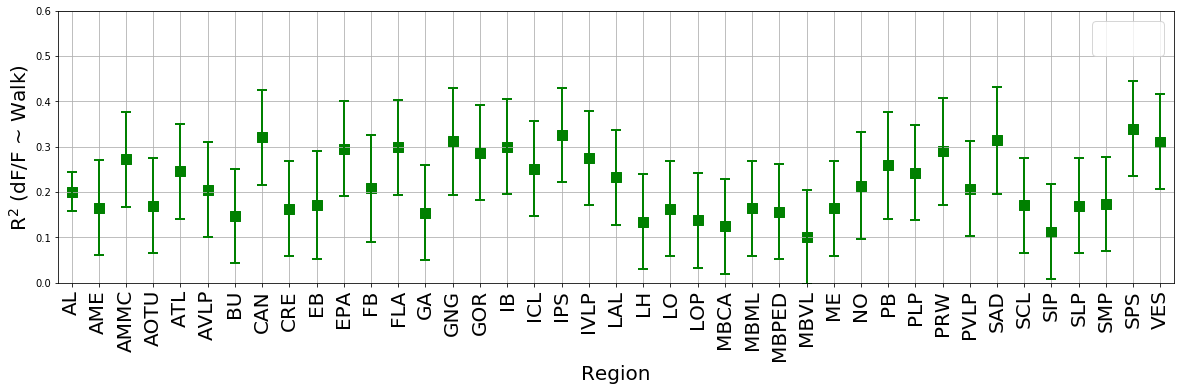

In [24]:
lin_reg = smf.ols(formula="R2Walk ~ RegionNames+UAS+GAL4", data=Regionsdf).fit()
fig, ax = plt.subplots(figsize=(20, 5))
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20    
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]

err_seriesgsum=[(a+err_series[0]) for a in err_series]

err_seriesgsum[0]=err_series[0]

coef_series=lin_reg.params.values[0:41]
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]
coef_series[coef_series<0]=0
coef_df = pd.DataFrame({'coef': coef_series,
                         'err': err_seriesgsum[0:41],
                        'varname': err_series.index.values[0:41]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', 
            yerr='err', 
            error_kw=dict(ecolor='g', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')

plt.xlabel('Region',fontsize=20)
plt.ylabel('R$^2$ (dF/F ~ Walk)',fontsize=20)

ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='g',label="Mixed model for fly ID")
plt.grid(b=None)
_ = ax.set_xticklabels(sorted(df3['RegionNames'].unique()), 
                       rotation=90, fontsize=20)

plt.ylim([0,0.6])
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2WalkwithRegionReg.svg')
#ax.set_xticks([])
#ax.set_yticks([])

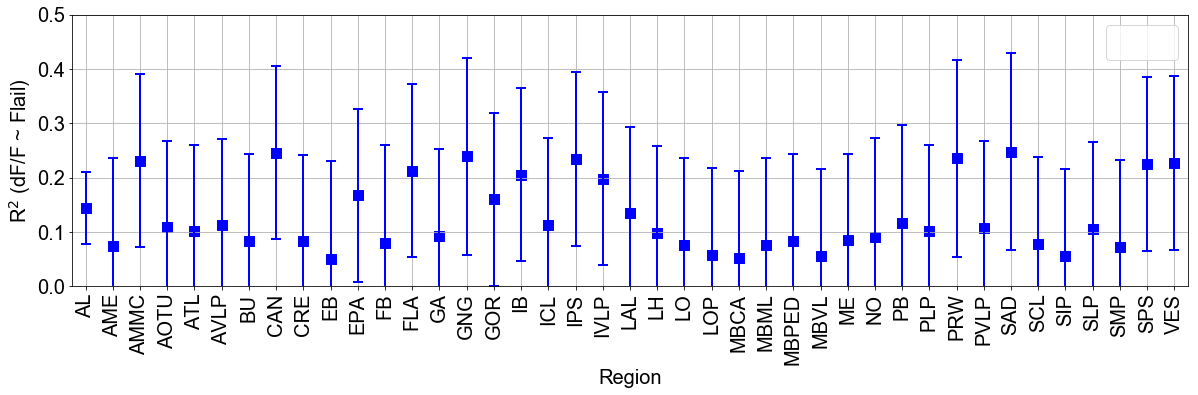

In [25]:
lin_reg = smf.ols(formula="R2Flail ~ RegionNames+UAS+GAL4", data=Regionsdf).fit()
fig, ax = plt.subplots(figsize=(20, 5))
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20    
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]

err_seriesgsum=[(a+err_series[0]) for a in err_series]

err_seriesgsum[0]=err_series[0]

coef_series=lin_reg.params.values[0:41]
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]
coef_series[coef_series<0]=0
coef_df = pd.DataFrame({'coef': coef_series,
                         'err': err_seriesgsum[0:41],
                        'varname': err_series.index.values[0:41]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', 
            yerr='err', 
            error_kw=dict(ecolor='b', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')

plt.xlabel('Region',fontsize=20)
plt.ylabel('R$^2$ (dF/F ~ Flail)',fontsize=20)
plt.ylim([0,0.5])
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='b',label="Mixed model for fly ID")
plt.grid(b=None)
_ = ax.set_xticklabels(sorted(df3['RegionNames'].unique()), 
                       rotation=90, fontsize=20)
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2FlailwithRegionReg.svg')


In [26]:
lin_reg = smf.ols(formula="R2Groom ~ RegionNames+UAS+GAL4", data=Regionsdf).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                R2Groom   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     24.25
Date:                Sat, 18 Dec 2021   Prob (F-statistic):           1.87e-78
Time:                        21:34:56   Log-Likelihood:                 524.64
No. Observations:                 375   AIC:                            -961.3
Df Residuals:                     331   BIC:                            -788.5
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0207      0.021      1.010      0.313      -0.020       0.061
RegionNames[T.AME]      -0.0104      0.028     -0.368      0.713      -0.066       0.045
RegionNames[T.AMMC]      0.0758      0.028      2.666      0.008       0.020       0.132
RegionNames[T.AOTU]     -0.0218      0.028     -0.767      0.444      -0.078       0.034
RegionNames[T.ATL]      -0.0353      0.028     -1.243      0.215      -0.091       0.021
RegionNames[T.AVLP]     -0.0151      0.028     -0.532      0.595      -0.071       0.041
RegionNames[T.BU]       -0.0388      0.028     -1.366      0.173      -0.095       0.017
RegionNames[T.CAN]      -0.0281      0.028     -0.989      0.324      -0.084       0.028
RegionNames[T.CRE]      -0.0344      0.028     -1.210      0.227      -0.090       0.022
RegionNames[T.EB]       -0.0205      0.035     -0.588      0.557      -0.089       0.048
RegionNames[T.EPA]      -0.0217      0.028     -0.763      0.446      -0.078       0.034
RegionNames[T.FB]       -0.0353      0.035     -1.014      0.311      -0.104       0.033
RegionNames[T.FLA]      -0.0080      0.028     -0.282      0.778      -0.064       0.048
RegionNames[T.GA]       -0.0160      0.028     -0.564      0.573      -0.072       0.040
RegionNames[T.GNG]       0.0942      0.035      2.704      0.007       0.026       0.163
RegionNames[T.GOR]      -0.0233      0.028     -0.821      0.412      -0.079       0.033
RegionNames[T.IB]       -0.0363      0.028     -1.276      0.203      -0.092       0.020
RegionNames[T.ICL]      -0.0188      0.028     -0.661      0.509      -0.075       0.037
RegionNames[T.IPS]       0.0338      0.028      1.189      0.235      -0.022       0.090
RegionNames[T.IVLP]      0.0407      0.028      1.431      0.153      -0.015       0.097
RegionNames[T.LAL]      -0.0228      0.028     -0.803      0.423      -0.079       0.033
RegionNames[T.LH]       -0.0133      0.028     -0.466      0.641      -0.069       0.043
RegionNames[T.LO]       -0.0173      0.028     -0.608      0.543      -0.073       0.039
RegionNames[T.LOP]       0.0048      0.028      0.170      0.865      -0.051       0.061
RegionNames[T.MBCA]     -0.0658      0.028     -2.313      0.021      -0.122      -0.010
RegionNames[T.MBML]     -0.0226      0.028     -0.795      0.427      -0.079       0.033
RegionNames[T.MBPED]    -0.0133      0.028     -0.467      0.641      -0.069       0.043
RegionNames[T.MBVL]     -0.0743      0.028     -2.612      0.009      -0.130      -0.018
RegionNames[T.ME]       -0.0105      0.028     -0.369      0.712      -0.066       0.045
RegionNames[T.NO]       -0.0206      0.035     -0.592      0.554      -0.089       0.048
RegionNames[T.PB]       -0.0312      0.035     -0.897      0.370      -0.100       0.037
RegionNames[T.PLP]      -0.0145      0.028     -0.511    

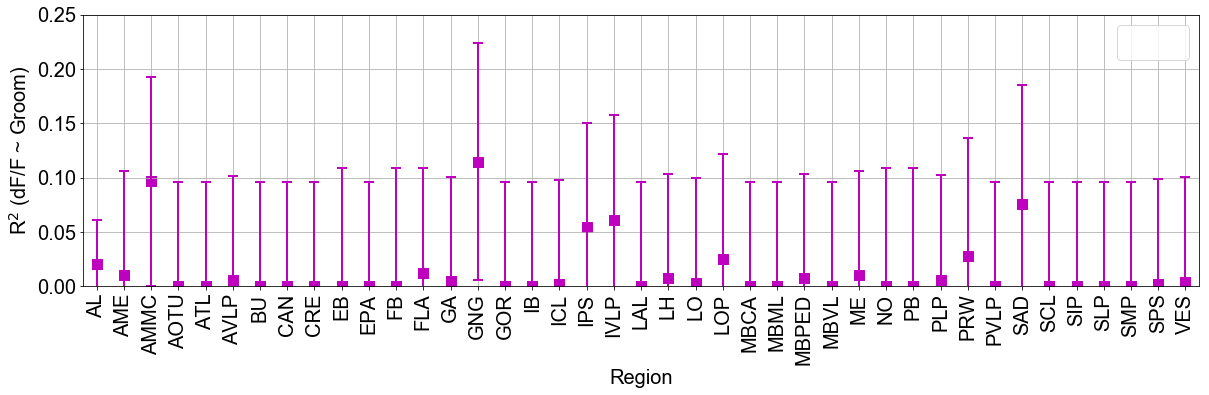

In [27]:
lin_reg = smf.ols(formula="R2Groom ~ RegionNames+UAS+GAL4", data=Regionsdf).fit()
fig, ax = plt.subplots(figsize=(20, 5))
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20    
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]

err_seriesgsum=[(a+err_series[0]) for a in err_series]

err_seriesgsum[0]=err_series[0]

coef_series=lin_reg.params.values[0:41]
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]
coef_series[coef_series<0]=0
coef_df = pd.DataFrame({'coef': coef_series,
                         'err': err_seriesgsum[0:41],
                        'varname': err_series.index.values[0:41]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', 
            yerr='err', 
            error_kw=dict(ecolor='m', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')

plt.xlabel('Region',fontsize=20)
plt.ylabel('R$^2$ (dF/F ~ Groom)',fontsize=20)
plt.ylim([0,0.25])
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='m',label="Mixed model for fly ID")
plt.grid(b=None)
_ = ax.set_xticklabels(sorted(df3['RegionNames'].unique()), 
                       rotation=90, fontsize=20)
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2GroomwithRegionReg.svg')


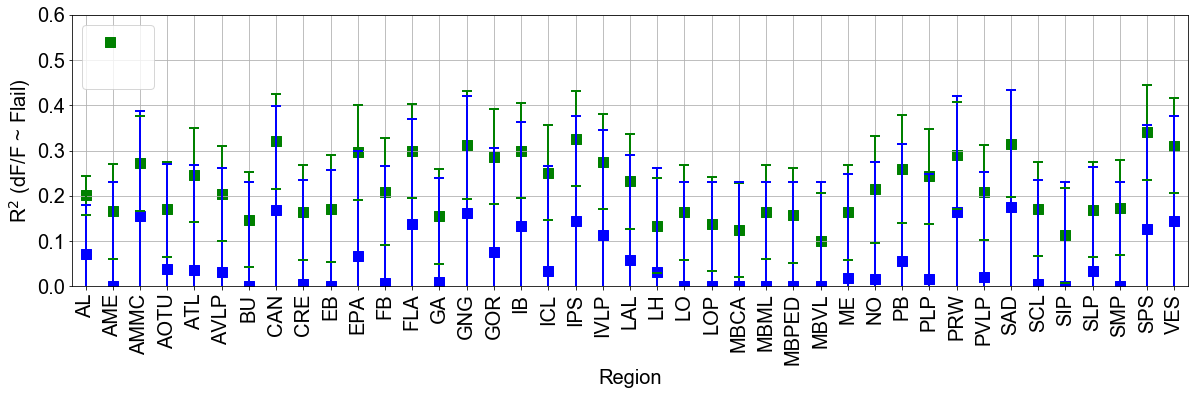

In [28]:
lin_reg = smf.ols(formula="R2Walk ~ RegionNames+UAS+GAL4", data=Regionsdf).fit()

fig, ax = plt.subplots(figsize=(20, 5))
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20    
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]

err_seriesgsum=[(a+err_series[0]) for a in err_series]

err_seriesgsum[0]=err_series[0]

coef_series=lin_reg.params.values[0:41]
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]
coef_series[coef_series<0]=0
coef_df = pd.DataFrame({'coef': coef_series,
                         'err': err_seriesgsum[0:41],
                        'varname': err_series.index.values[0:41]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', 
            yerr='err', 
            error_kw=dict(ecolor='g', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')

plt.xlabel('Region',fontsize=20)
plt.ylabel('R$^2$ (dF/F ~ Walk)',fontsize=20)

ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='g',label="Mixed model for fly ID")
#----------------------------

lin_reg = smf.ols(formula="R2Flail ~ RegionNames+UAS+GAL4+FR", data=Regionsdf).fit()

err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]

err_seriesgsum=[(a+err_series[0]) for a in err_series]

err_seriesgsum[0]=err_series[0]

coef_series=lin_reg.params.values[0:41]
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]
coef_series[coef_series<0]=0
coef_df = pd.DataFrame({'coef': coef_series,
                         'err': err_seriesgsum[0:41],
                        'varname': err_series.index.values[0:41]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', 
            yerr='err', 
            error_kw=dict(ecolor='b', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')

plt.xlabel('Region',fontsize=20)
plt.ylabel('R$^2$ (dF/F ~ Flail)',fontsize=20)

ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='b',label="Mixed model for fly ID")
plt.grid(b=None)
_ = ax.set_xticklabels(sorted(df3['RegionNames'].unique()), 
                       rotation=90, fontsize=20)
plt.ylim([0,0.6])
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2Flail_WalkwithRegionReg.svg')
#ax.set_xticks([])
#ax.set_yticks([])

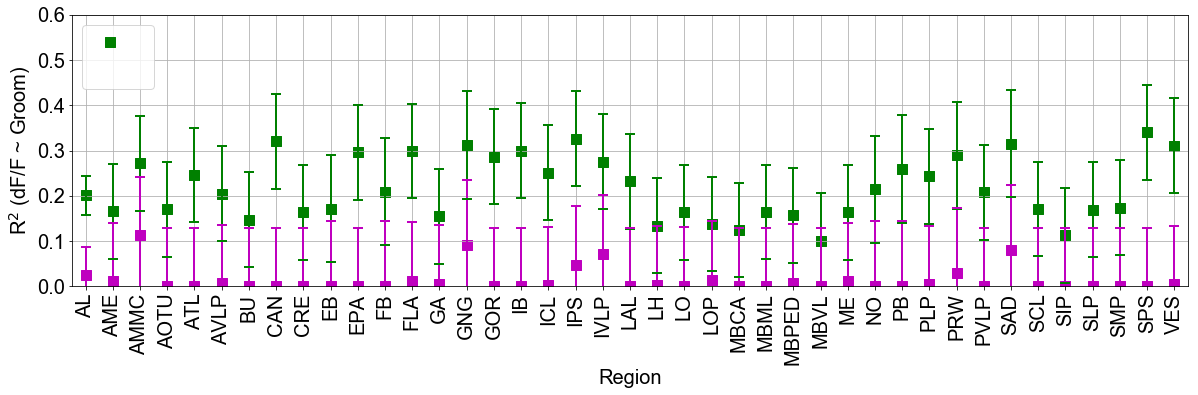

In [29]:
lin_reg = smf.ols(formula="R2Walk ~ RegionNames+UAS+GAL4", data=Regionsdf).fit()

fig, ax = plt.subplots(figsize=(20, 5))
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20    
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]

err_seriesgsum=[(a+err_series[0]) for a in err_series]

err_seriesgsum[0]=err_series[0]

coef_series=lin_reg.params.values[0:41]
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]
coef_series[coef_series<0]=0
coef_df = pd.DataFrame({'coef': coef_series,
                         'err': err_seriesgsum[0:41],
                        'varname': err_series.index.values[0:41]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', 
            yerr='err', 
            error_kw=dict(ecolor='g', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')

plt.xlabel('Region',fontsize=20)
plt.ylabel('R$^2$ (dF/F ~ Walk)',fontsize=20)

ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='g',label="Mixed model for fly ID")

#----------------------------

lin_reg = smf.ols(formula="R2Groom ~ RegionNames+UAS+GAL4+FR", data=Regionsdf).fit()

err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]

err_seriesgsum=[(a+err_series[0]) for a in err_series]

err_seriesgsum[0]=err_series[0]

coef_series=lin_reg.params.values[0:41]
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]
coef_series[coef_series<0]=0
coef_df = pd.DataFrame({'coef': coef_series,
                         'err': err_seriesgsum[0:41],
                        'varname': err_series.index.values[0:41]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', 
            yerr='err', 
            error_kw=dict(ecolor='m', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')

plt.xlabel('Region',fontsize=20)
plt.ylabel('R$^2$ (dF/F ~ Groom)',fontsize=20)
plt.ylim([0,0.6])
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='m',label="Mixed model for fly ID")
plt.grid(b=None)
_ = ax.set_xticklabels(sorted(df3['RegionNames'].unique()), 
                       rotation=90, fontsize=20)

plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2Groom_WalkwithRegionReg.svg')
#ax.set_xticks([])
#ax.set_yticks([])

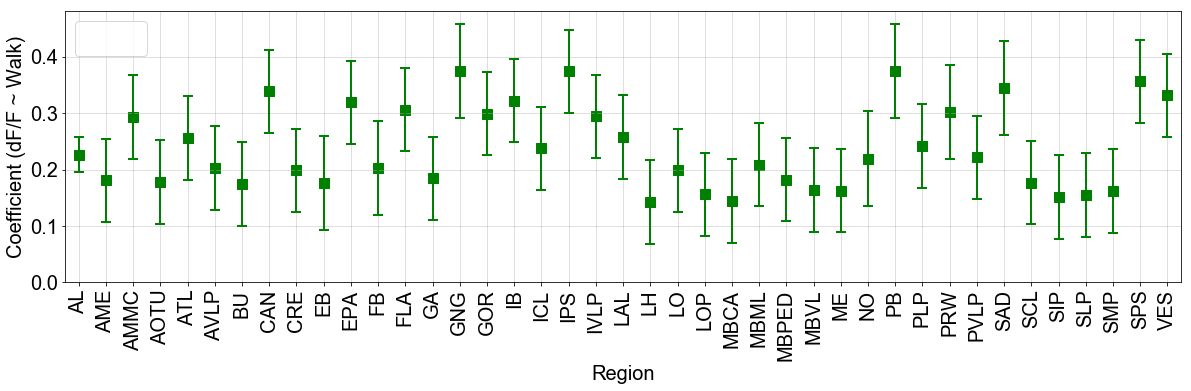

In [30]:
lin_reg = smf.ols(formula="CoefWalk ~ RegionNames+UAS+GAL4+FR", data=Regionsdf).fit()
fig, ax = plt.subplots(figsize=(20, 5))
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20    
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]

err_seriesgsum=[(a+err_series[0]) for a in err_series]

err_seriesgsum[0]=err_series[0]

coef_series=lin_reg.params.values[0:41]
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]

coef_df = pd.DataFrame({'coef': coef_series,
                         'err': err_seriesgsum[0:41],
                        'varname': err_series.index.values[0:41]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', 
            yerr='err', 
            error_kw=dict(ecolor='g', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')

plt.xlabel('Region',fontsize=20)
plt.ylabel('Coefficient (dF/F ~ Walk)',fontsize=20)

ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='g',label="Mixed model for fly ID")
plt.grid(b=None)
_ = ax.set_xticklabels(sorted(df3['RegionNames'].unique()), 
                       rotation=90, fontsize=20)
ax.axhline(y=0, linestyle='--', color='black', linewidth=1)
ax.grid(True,alpha=0.5)
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\CoefWalkwithRegionReg.svg')
#ax.set_xticks([])
#ax.set_yticks([])

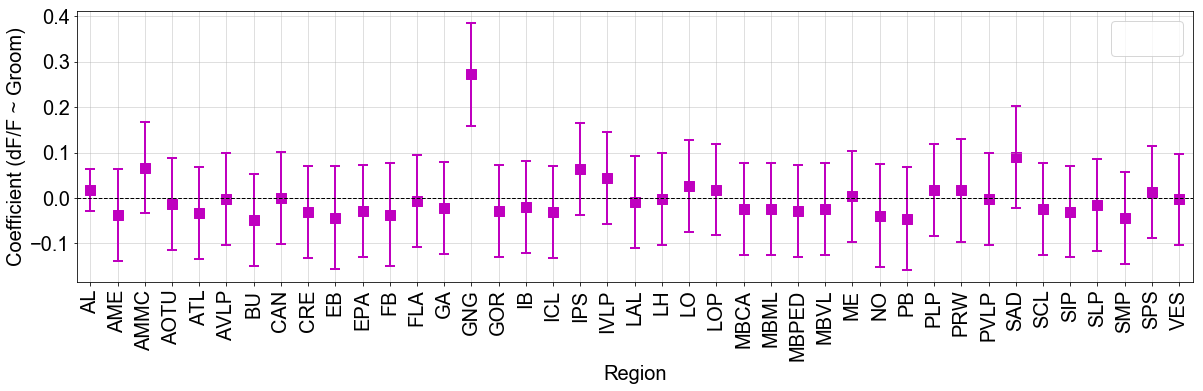

In [31]:
lin_reg = smf.ols(formula="CoefGroom ~ RegionNames+UAS+GAL4+FR", data=Regionsdf).fit()
fig, ax = plt.subplots(figsize=(20, 5))
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20    
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]

err_seriesgsum=[(a+err_series[0]) for a in err_series]

err_seriesgsum[0]=err_series[0]

coef_series=lin_reg.params.values[0:41]
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]

coef_df = pd.DataFrame({'coef': coef_series,
                         'err': err_seriesgsum[0:41],
                        'varname': err_series.index.values[0:41]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', 
            yerr='err', 
            error_kw=dict(ecolor='m', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')

plt.xlabel('Region',fontsize=20)
plt.ylabel('Coefficient (dF/F ~ Groom)',fontsize=20)

ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='m',label="Mixed model for fly ID")
plt.grid(b=None)
_ = ax.set_xticklabels(sorted(df3['RegionNames'].unique()), 
                       rotation=90, fontsize=20)
ax.axhline(y=0, linestyle='--', color='black', linewidth=1)
ax.grid(True,alpha=0.5)
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\CoefGroomwithRegionReg.svg')
#ax.set_xticks([])
#ax.set_yticks([])

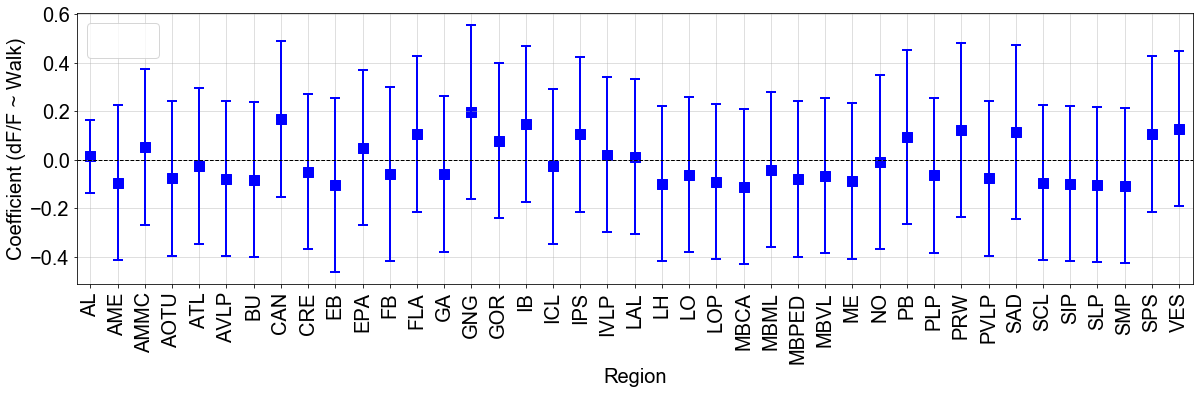

In [32]:
lin_reg = smf.ols(formula="CoefFlail ~ RegionNames+UAS+GAL4+FR", data=Regionsdf).fit()
fig, ax = plt.subplots(figsize=(20, 5))
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 20    
err_series = lin_reg.params - lin_reg.conf_int(alpha=0.05)[0]

err_seriesgsum=[(a+err_series[0]) for a in err_series]

err_seriesgsum[0]=err_series[0]

coef_series=lin_reg.params.values[0:41]
coef_series=coef_series+lin_reg.params.values[0]
coef_series[0]=lin_reg.params.values[0]

coef_df = pd.DataFrame({'coef': coef_series,
                         'err': err_seriesgsum[0:41],
                        'varname': err_series.index.values[0:41]
                       })

coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', 
            yerr='err', 
            error_kw=dict(ecolor='b', lw=2, capsize=5, capthick=2,transform=trans+offset(0)),
            label='')

plt.xlabel('Region',fontsize=20)
plt.ylabel('Coefficient (dF/F ~ Walk)',fontsize=20)

ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(0), 
          y=coef_df['coef'], color='b',label="Mixed model for fly ID")
plt.grid(b=None)
_ = ax.set_xticklabels(sorted(df3['RegionNames'].unique()), 
                       rotation=90, fontsize=20)
ax.axhline(y=0, linestyle='--', color='black', linewidth=1)
ax.grid(True,alpha=0.5)
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\CoefFlailwithRegionReg.svg')
#ax.set_xticks([])
#ax.set_yticks([])

# Get Rsquared values list for maps

In [33]:
Regionsdf[Regionsdf['R2Walk']>0].expID.unique()

array(['216', '100761', '103', '104', '100106', 'B34', 'B35', 'B36',
       'B37', 'B41', 'B42', 'B43', 'B180', 'B182', 'B183', 'B192', 'B193',
       'B194', 'B195', 'B196', '981', '100133', 'B993', 'B1037', 'B1047'],
      dtype=object)

In [34]:
df=Regionsdf[Regionsdf['R2Walk']>0]
df2=df[['R2Walk','RegionNum','RegionNames']]
df2=df2.dropna()
file='Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\MedianR2WalkPAN.txt'
df=df2
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\MedianR2WalkPAN.txt', 'w') as f:
    for j in range(75):
        df2=df.loc[df['RegionNum']==j]
        f.write(str(np.median(df.loc[df['RegionNames']==list(df2['RegionNames'])[0],'R2Walk'])))        
        f.write('\n')
        
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\ListR2Files.txt', 'a') as f:
    f.write(file.replace('Z:\\GrunwaldKadow_group','/media/NAS').replace('\\','/'))        
    f.write('\n') 
    print(file.replace('Z:\\GrunwaldKadow_group','/media/NAS').replace('\\','/'))    

/media/NAS/Sophie/WalkProject/Figures/Figure1/MedianR2WalkPAN.txt


In [35]:
Regionsdf[Regionsdf['R2Flail']>0].expID.unique()

array(['B42', 'B183', 'B190', 'B192', 'B1037', 'B675', 'KC00060'],
      dtype=object)

In [36]:
df=Regionsdf[Regionsdf['R2Flail']>0]
df2=df[['R2Flail','RegionNum','RegionNames']]
df2=df2.dropna()
file='Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\MedianR2FlailPAN.txt'
df=df2
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\MedianR2FlailPAN.txt', 'w') as f:
    for j in range(75):
        df2=df.loc[df['RegionNum']==j]
        #f.write(compid)

        f.write(str(np.median(df.loc[df['RegionNames']==list(df2['RegionNames'])[0],'R2Flail'])))        
        f.write('\n')
        #print((str(np.median(df2['R2Flail']))))
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\ListR2Files.txt', 'a') as f:
    f.write(file.replace('Z:\\GrunwaldKadow_group','/media/NAS').replace('\\','/'))        
    f.write('\n') 
    #print(file.replace('Z:\\GrunwaldKadow_group','/media/NAS').replace('\\','/'))    

In [37]:
Regionsdf[Regionsdf['R2Groom']>0].expID.unique()

array(['244', '100761', 'B42', 'B192', '100133'], dtype=object)

In [38]:
df=Regionsdf[Regionsdf['R2Groom']>0]

with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\MedianR2AllGroomPAN.txt', 'w') as f:
    for j in range(75):
        df2=df.loc[df['RegionNum']==j]
        #f.write(compid)

        f.write(str(np.nanmedian(df.loc[df['RegionNames']==list(df2['RegionNames'])[0],'R2Groom'])))        
        f.write('\n')
       # print((str(np.nanmedian(df.loc[df['RegionNames']==list(df2['RegionNames'])[0],'R2Groom']))))
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\ListR2Files.txt', 'a') as f:
    f.write(file.replace('Z:\\GrunwaldKadow_group','/media/NAS').replace('\\','/'))        
    f.write('\n') 
   # print(file.replace('Z:\\GrunwaldKadow_group','/media/NAS').replace('\\','/'))    

# Global comparison Rsquare

In [10]:
np.nanmedian(Regionsdf['R2Walk'])

0.2535163699563392

In [14]:
df3=dfWGF.query('GAL4=="Nsyb" or GAL4=="GMR57C10"')
np.nanmedian(df3.loc[df3['Behavior']=='Walk','R2'])

0.1940851869103093

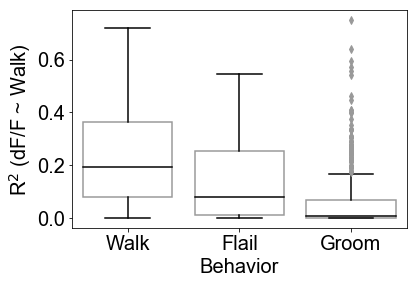

In [39]:
df3=dfWGF.query('GAL4=="Nsyb" or GAL4=="GMR57C10"')
ax=sns.boxplot(x='Behavior',y='R2',data=df3,color='w')
for j in range(18):
     ax.lines[j].set_color('black')
        
plt.ylabel('R$^2$ (dF/F ~ Walk)')
# for i,violin in enumerate(ax.artists):
#     violin.set_edgecolor('black')
#     box.set_facecolor('white')
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\BoxR2RegionsAllBehaviorp.svg')


In [17]:
dfWalkR2=df3.loc[df3['Behavior']=='Walk'].groupby('FlyID').mean()
dfFlailR2=df3.loc[df3['Behavior']=='Flail'].groupby('FlyID').mean()
dfGroomR2=df3.loc[df3['Behavior']=='Groom'].groupby('FlyID').mean()

In [19]:
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\BehaviorPairR2_pvaluesperfly.txt', 'w') as f:

        print('Walk vs Flail')
        
        f.write("{0:0.10f}".format(scipy.stats.mannwhitneyu(dfWalkR2.loc[dfWalkR2['R2']>0]['R2'], dfFlailR2.loc[dfFlailR2['R2']>0]['R2']).pvalue*3))        
        f.write('\n')
        print("{0:0.10f}".format(scipy.stats.mannwhitneyu(dfWalkR2.loc[dfWalkR2['R2']>0]['R2'], dfFlailR2.loc[dfFlailR2['R2']>0]['R2']).pvalue*3))

        print('Walk vs Groom')
        
        f.write("{0:0.10f}".format(scipy.stats.mannwhitneyu(dfWalkR2.loc[dfWalkR2['R2']>0]['R2'],dfGroomR2.loc[dfGroomR2['R2']>0]['R2']).pvalue*3))        
        f.write('\n')
        print("{0:0.10f}".format(scipy.stats.mannwhitneyu(dfWalkR2.loc[dfWalkR2['R2']>0]['R2'], dfGroomR2.loc[dfGroomR2['R2']>0]['R2']).pvalue*3))

        print('Flail vs Groom')
        
        f.write("{0:0.10f}".format(scipy.stats.mannwhitneyu(dfFlailR2.loc[dfFlailR2['R2']>0]['R2'],dfGroomR2.loc[dfGroomR2['R2']>0]['R2']).pvalue*3))        
        f.write('\n')
        print("{0:0.10f}".format(scipy.stats.mannwhitneyu(dfFlailR2.loc[dfFlailR2['R2']>0]['R2'],dfGroomR2.loc[dfGroomR2['R2']>0]['R2']).pvalue*3))



Walk vs Flail
0.0853191147
Walk vs Groom
0.0106916339
Flail vs Groom
0.2621037348


In [42]:
df3.loc[df3['Behavior']=='Groom']['FlyID'].unique()

array([ 2,  4, 10, 13, 15, 24], dtype=int64)

In [43]:
df3.loc[df3['Behavior']=='Flail']['FlyID'].unique()

array([10, 11, 12, 13, 26, 28, 38], dtype=int64)

In [44]:
df3.loc[df3['Behavior']=='Walk']['FlyID'].unique()

array([ 1,  4,  6,  7,  9, 10, 11, 13, 15, 16, 18, 20, 24, 25, 26, 27],
      dtype=int64)

# Axon vs cytoplasm

In [45]:
Regionsdf=pd.read_pickle("Z:\GrunwaldKadow_group\Sophie\WalkProject\Regionsdf.pkl")

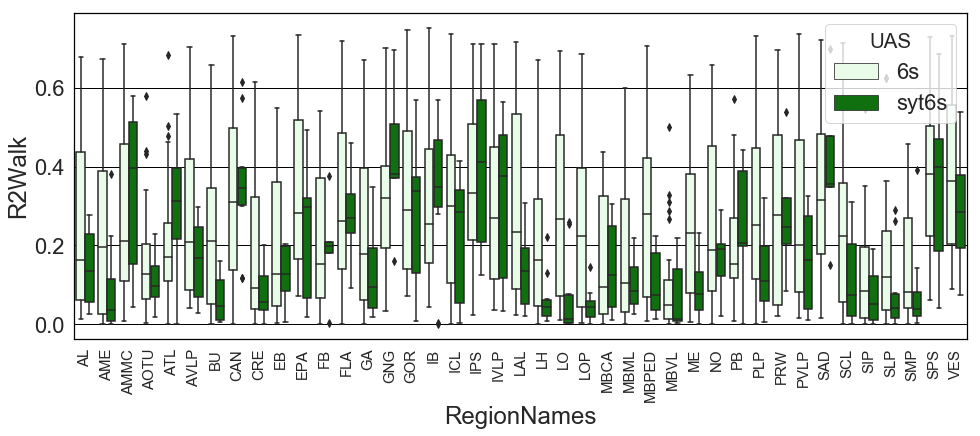

In [46]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))

df2=Regionsdf
df3=df2.query('GAL4!="Trh" or GAL4!="TDC" or GAL4!="TH" or GAL4!="Cha" or GAL4!="Gad" or GAL4!="Vglut"')
df4=df3.query('UAS=="syt6s" or UAS=="6s"')
#df2=Regionsdf.loc[Regionsdf['GAL4']=='Nsyb']

b = sns.boxplot(x='RegionNames',y='R2Walk', hue='UAS',data=df4,color='g',order=sorted(df3['RegionNames'].unique()))

   

plt.xticks(rotation=90)
plt.xticks(fontsize=15)


plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2RegionsAllWalk_sytg_notsyt.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

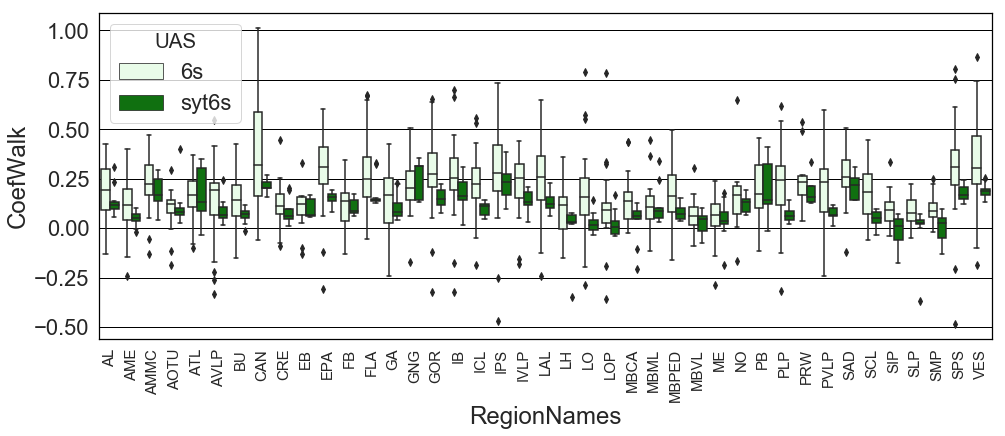

In [47]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))

df2=Regionsdf
df3=df2.query('GAL4!="Trh" or GAL4!="TDC" or GAL4!="TH" or GAL4!="Cha" or GAL4!="Gad" or GAL4!="Vglut"')
df4=df3.query('UAS=="syt6s" or UAS=="6s"')
#df2=Regionsdf.loc[Regionsdf['GAL4']=='Nsyb']

b = sns.boxplot(x='RegionNames',y='CoefWalk', hue='UAS',data=df4,color='g',order=sorted(df3['RegionNames'].unique()))



plt.xticks(rotation=90)
plt.xticks(fontsize=15)


plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\CoefRegionsAllWalk_sytg_notsyt.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

In [48]:
df=Regionsdf.query('UAS=="syt6s"')
df2=df[['R2Walk','RegionNum','RegionNames']]
df2=df2.dropna()

df=df2
file='Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\MedianR2SytWalk.txt'
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\MedianR2SytWalk.txt', 'w') as f:
    for j in range(75):
        df2=df.loc[df['RegionNum']==j]
        #f.write(compid)

        f.write(str(np.median(df.loc[df['RegionNames']==list(df2['RegionNames'])[0],'R2Walk'])))        
        f.write('\n')
        #print((str(np.median(df2['R2Walk']))))
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\ListR2Files.txt', 'a') as f:
    f.write(file.replace('Z:\\GrunwaldKadow_group','/media/NAS').replace('\\','/'))        
    f.write('\n') 
    #print(file.replace('Z:\\GrunwaldKadow_group','/media/NAS').replace('\\','/'))    

In [49]:
df=Regionsdf.query('UAS=="6s"')
df2=df[['R2Walk','RegionNum','RegionNames']]
df2=df2.dropna()

df=df2
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\MedianR2_6sWalk.txt', 'w') as f:
    for j in range(75):
        df2=df.loc[df['RegionNum']==j]
        #f.write(compid)

        f.write(str(np.median(df.loc[df['RegionNames']==list(df2['RegionNames'])[0],'R2Walk'])))        
        f.write('\n')
        
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\ListR2Files.txt', 'a') as f:
    f.write(file.replace('Z:\\GrunwaldKadow_group','/media/NAS').replace('\\','/'))        
    f.write('\n') 
    print(file.replace('Z:\\GrunwaldKadow_group','/media/NAS').replace('\\','/'))    

/media/NAS/Sophie/WalkProject/Figures/Figure1/MedianR2SytWalk.txt


In [50]:
df=Regionsdf.query('UAS=="6s" or UAS=="syt6s"')
result = smf.ols(formula="R2Walk ~ UAS", data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 R2Walk   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     37.71
Date:                Sat, 18 Dec 2021   Prob (F-statistic):           1.07e-09
Time:                        21:36:00   Log-Likelihood:                 267.27
No. Observations:                1382   AIC:                            -530.5
Df Residuals:                    1380   BIC:                            -520.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.2571      0.006     40.946      0.000       0.245       0.269
UAS[T.syt6s]    -0.0743      0.012     -6.141      0.000      -0.098      -0.051
==============================================================================
Omnibus:                      128.495   Durbin-Watson:                   0.619
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.573
Skew:                           0.666   Prob(JB):                     2.42e-27
Kurtosis:                       2.406   Cond. No.                         2.45
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Eye covered versus not

In [51]:
result = smf.ols(formula="R2Walk ~ UAS+GAL4+FR+RegionNames+eye_painted", data=Regionsdf).fit()

In [52]:
aov_table = anova_lm(result, typ=2)
print(result.rsquared)
aov_table

0.30184966217950004


,sum_sq,df,F,PR(>F)
UAS,9.010537,5.0,82.006881,7.142009e-64
GAL4,16.129131,7.0,104.853407,9.766496e-44
RegionNames,8.668703,40.0,9.861971,5.346230e-53
eye_painted,0.003864,1.0,0.175848,6.750170e-01
FR,3.803599,1.0,173.086969,9.100005e-38
Residual,38.478359,1751.0,NaN,NaN


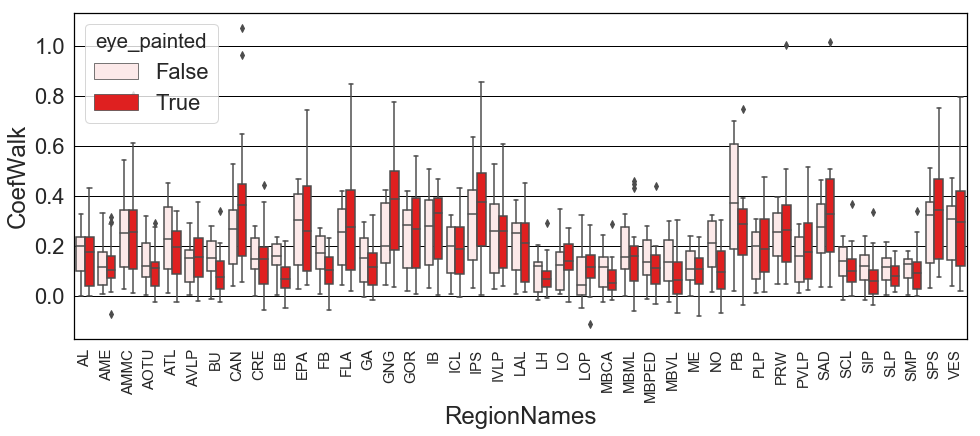

In [53]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))

df3=Regionsdf
#df3=df2.dropna()
df3=df3.query('eye_painted==True or eye_painted==False')
df3=df3.loc[df3['UAS']!='7f']
df3=df3.loc[df3['UAS']!='6f']
df3=df3.loc[df3['FR']!=100]


b = sns.boxplot(x='RegionNames',y='CoefWalk',hue='eye_painted',order=sorted(df3['RegionNames'].unique()),data=df3,color='r')


plt.xticks(rotation=90)
plt.xticks(fontsize=15)


plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\CoefRegionsEyeCoveredG_notcoveredMWalk.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

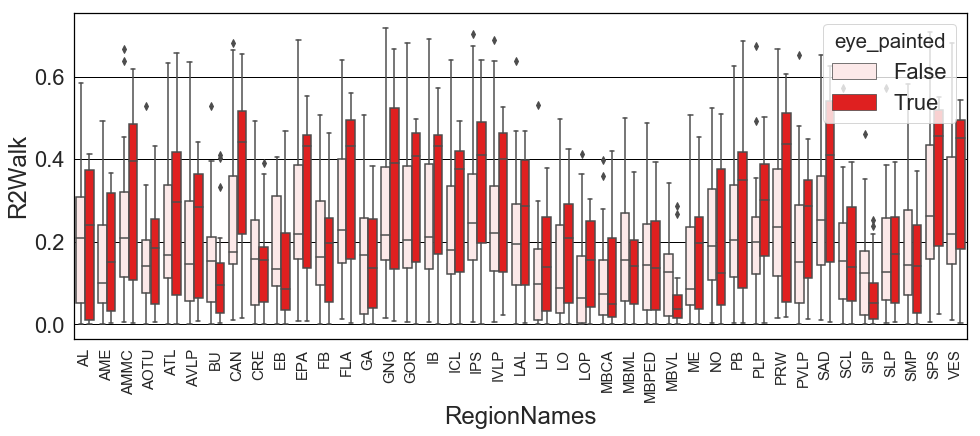

In [54]:
sns.set_style("whitegrid",{"axes.edgecolor": "0",'grid.color': '0','font.family':'Arial'})
sns.set_context("notebook",font_scale=2)
plt.figure(figsize=(16, 6))

df3=Regionsdf
#df3=df2.dropna()
df3=df3.query('eye_painted==True or eye_painted==False')

df3=df3.loc[df3['UAS']!='7f']
df3=df3.loc[df3['UAS']!='6f']
df3=df3.loc[df3['FR']!=100]

b = sns.boxplot(x='RegionNames',y='R2Walk',hue='eye_painted',order=sorted(df3['RegionNames'].unique()),data=df3,color='r')


plt.xticks(rotation=90)
plt.xticks(fontsize=15)


plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2RegionsEyeCoveredG_notcoveredMWalk.svg')
#plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\R2TurnipsimcontraredAmines.png')
    
plt.show()

In [55]:
print('not eye covered')
print(df3[df3['eye_painted']==False]['FlyID'].unique())
print(df3[df3['eye_painted']==False]['UAS'].unique())
print(df3[df3['eye_painted']==False]['GAL4'].unique())
print('eye covered')
print(df3[df3['eye_painted']==True]['FlyID'].unique())
print(df3[df3['eye_painted']==True]['UAS'].unique())
print(df3[df3['eye_painted']==False]['GAL4'].unique())

not eye covered
[ 6  9 10 20 24]
['6m' '6s']
['Nsyb' 'GMR57C10']
eye covered
[11 13 25 26 27]
['6m' '7s' '6s']
['Nsyb' 'GMR57C10']


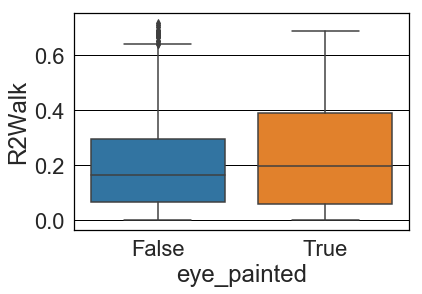

In [56]:
df3=Regionsdf
df3=df3.loc[df3['UAS']!='7f']
df3=df3.loc[df3['UAS']!='6f']
df3=df3.loc[df3['FR']!=100]
b = sns.boxplot(x='eye_painted',y='R2Walk',data=df3)
#b = sns.scatterplot(x='eye_painted',y='R2Walk',data=Regionsdf)
plt.savefig('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\BoxAllFliesR2WalkPaintedvsNot.svg')


In [57]:
print("{0:0.10f}".format(scipy.stats.mannwhitneyu(df3.loc[df3['eye_painted']==False].groupby('FlyID').mean()['R2Walk'],df3.loc[df3['eye_painted']==True].groupby('FlyID').mean()['R2Walk']).pvalue))



0.3380516570


In [58]:
result = smf.ols(formula="R2Walk ~ eye_painted+UAS+GAL4-1", data=Regionsdf).fit()
aov_table = anova_lm(result, typ=2)
print(result.rsquared)
aov_table

0.0716741271889132


,sum_sq,df,F,PR(>F)
eye_painted,11.325734,2.0,196.765916,2.868142e-78
UAS,5.093397,5.0,35.395747,1.550233e-28
GAL4,8.645580,7.0,42.915049,5.997183e-19
Residual,53.731726,1867.0,NaN,NaN


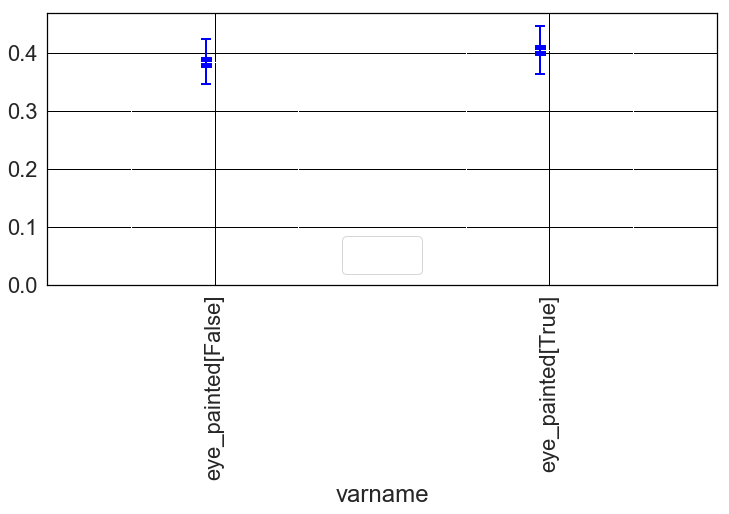

In [59]:

fig, ax = plt.subplots(figsize=(12, 5))
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

###################3

err_series = result.params - result.conf_int(alpha=0.05)[0]
coef_df = pd.DataFrame({'coef': result.params[0:2],
                       'err': err_series.values[0:2],
                       'varname': err_series.index.values[0:2]
                      })


coef_df.plot(x='varname', y='coef', kind='bar', 
            ax=ax, color='none', 
            yerr='err', 
            error_kw=dict(ecolor='blue', lw=2, capsize=5, capthick=2,transform=trans+offset(-9)),
            label='')

ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
          marker='s', s=120,transform=trans+offset(-9), 
          y=coef_df['coef'], color='blue',label="Model for fly ID")

In [60]:
df3=Regionsdf.loc[Regionsdf['eye_painted']==False]
df3=df3.loc[df3['UAS']!='7f']
df3=df3.loc[df3['UAS']!='6f']
df3=df3.loc[df3['FR']!=100]

file='Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\MedianR2_not_eye_paintedWalk.txt'
df=df3
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\MedianR2_not_eye_paintedWalk.txt', 'w') as f:
    for j in range(75):
        df2=df.loc[df['RegionNum']==j]
        #f.write(compid)

        f.write(str(np.nanmedian(df.loc[df['RegionNames']==list(df2['RegionNames'])[0],'R2Walk'])))        
        f.write('\n')
       # print((str(np.nanmedian(df2['R2Walk']))))
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\ListR2Files.txt', 'a') as f:
    f.write(file.replace('Z:\\GrunwaldKadow_group','/media/NAS').replace('\\','/'))        
    f.write('\n') 
   # print(file.replace('Z:\\GrunwaldKadow_group','/media/NAS').replace('\\','/'))    

In [61]:
df3=Regionsdf.loc[Regionsdf['eye_painted']==True]
df3=df3.loc[df3['UAS']!='7f']
df3=df3.loc[df3['UAS']!='6f']
df3=df3.loc[df3['FR']!=100]
df=df3
file='Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\MedianR2_eye_paintedWalk.txt'
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\Figure1\MedianR2_eye_paintedWalk.txt', 'w') as f:
    for j in range(75):
        df2=df.loc[df['RegionNum']==j]
        #f.write(compid)

        f.write(str(np.nanmedian(df.loc[df['RegionNames']==list(df2['RegionNames'])[0],'R2Walk'])))        
        f.write('\n')
        
with open('Z:\GrunwaldKadow_group\Sophie\WalkProject\Figures\ListR2Files.txt', 'a') as f:
    f.write(file.replace('Z:\\GrunwaldKadow_group','/media/NAS').replace('\\','/'))        
    f.write('\n') 
    print(file.replace('Z:\\GrunwaldKadow_group','/media/NAS').replace('\\','/'))                     

/media/NAS/Sophie/WalkProject/Figures/Figure1/MedianR2_eye_paintedWalk.txt
